In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    plt.colorbar(ax.matshow(corr,vmin=-1,vmax=1))
    
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
        
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

# Exploratory Data Analysis

## Data Set 1

In [2]:
data_set_1 = pd.read_csv('data_cortex_nuclear.csv')
data_set_1_sub = data_set_1[['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N','class']]
data_set_1_sub.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934
std,0.249362,0.251640,0.049383,0.347293,0.933100
min,0.145327,0.245359,0.115181,1.330831,1.737540
25%,0.288121,0.473361,0.287444,2.057411,3.155678
50%,0.366378,0.565782,0.316564,2.296546,3.760855
75%,0.487711,0.698032,0.348197,2.528481,4.440011
max,2.516367,2.602662,0.497160,3.757641,8.482553


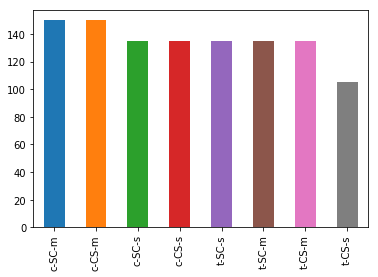

In [3]:
data_set_1['class'].value_counts().plot(kind='bar')

C:\apps\Anaconda3\envs\ds8002\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead



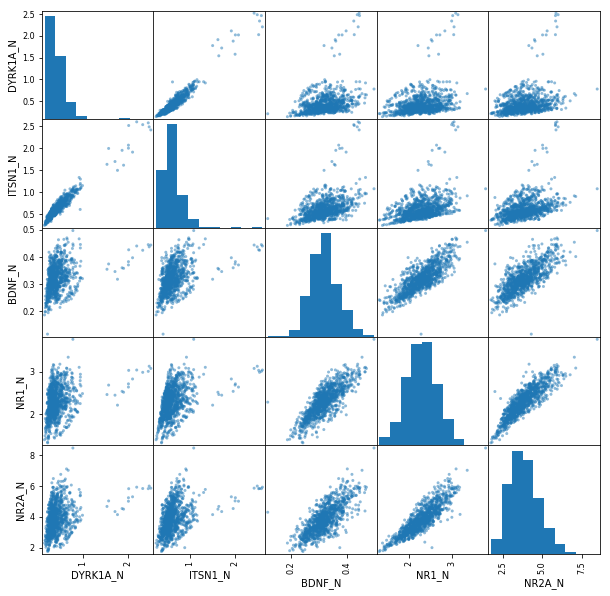

In [4]:
plot_df = data_set_1[['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N']]
pd.scatter_matrix(plot_df, figsize=(10, 10), diagonal='hist');

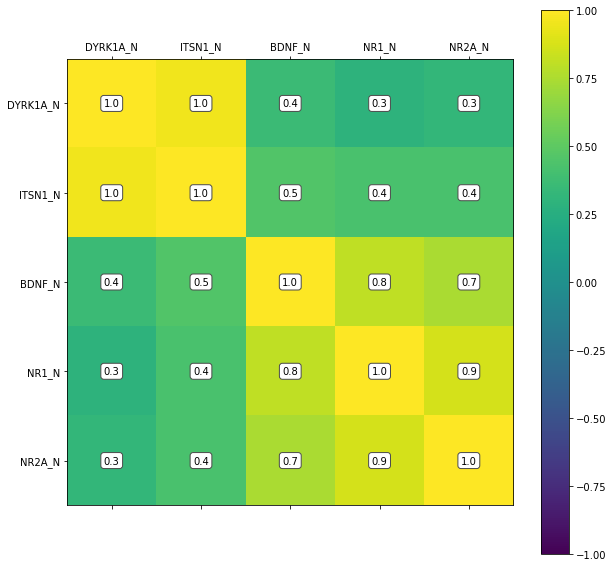

In [5]:
plot_corr(data_set_1_sub)

## Dataset 2

In [6]:
data_set_2_training = pd.read_csv('forest_type_training.csv')
data_set_2_testing = pd.read_csv('forest_type_testing.csv')
data_set_2_full = pd.concat([data_set_2_training,data_set_2_testing])

In [7]:
data_set_2_sub = data_set_2_full[['b1','b2','pred_minus_obs_S_b1','pred_minus_obs_S_b2','pred_minus_obs_S_b9','class']]
data_set_2_sub.describe()

,b1,b2,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b9
count,523.000000,523.000000,523.000000,523.000000,523.000000
mean,59.887189,39.380497,-20.017304,-1.056195,-4.201377
std,12.345004,15.930120,3.806830,1.375642,1.518350
min,31.000000,23.000000,-32.950000,-8.800000,-10.830000
25%,51.500000,28.000000,-22.505000,-1.795000,-4.940000
50%,58.000000,32.000000,-19.990000,-1.030000,-4.130000
75%,67.000000,48.000000,-18.080000,-0.300000,-3.245000
max,107.000000,160.000000,5.130000,12.460000,7.790000


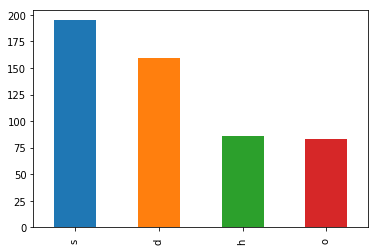

In [8]:
data_set_2_sub['class'].value_counts().plot(kind='bar')

C:\apps\Anaconda3\envs\ds8002\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead



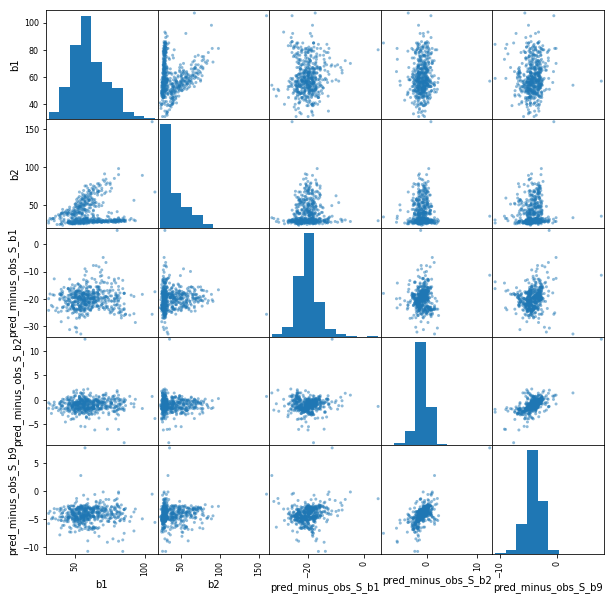

In [9]:
plot_df = data_set_2_sub[['b1','b2','pred_minus_obs_S_b1','pred_minus_obs_S_b2','pred_minus_obs_S_b9']]
pd.scatter_matrix(plot_df, figsize=(10, 10), diagonal='hist');

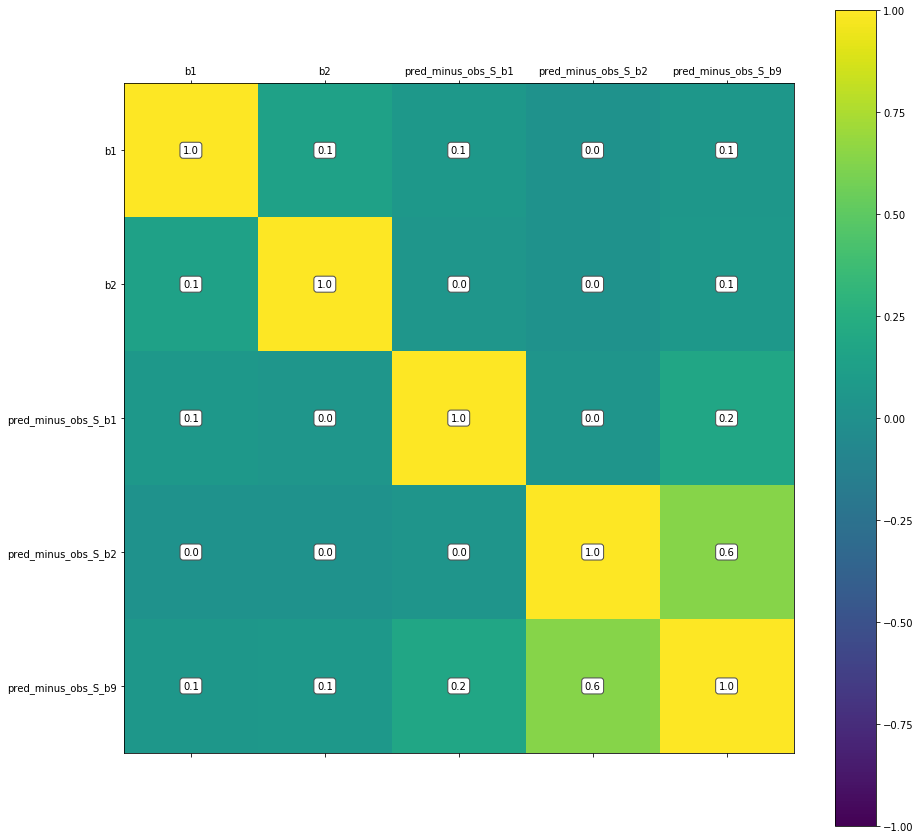

In [10]:
plot_corr(data_set_2_sub,size=15)

# Data Preparation

## Dataset 1

In [11]:
data_set_1_sub = data_set_1_sub.sample(frac=1)
data_set_1_sub = data_set_1_sub.dropna()
temp_matrix_1 = data_set_1_sub[['DYRK1A_N','ITSN1_N','BDNF_N','NR1_N','NR2A_N']].as_matrix()
data_input_matrix_1 = np.zeros(shape=(len(temp_matrix_1),temp_matrix_1.shape[1]+1))

for t in range(len(data_input_matrix_1)):
    data_input_matrix_1[t,0] = 1

for t in range(len(data_input_matrix_1)):
    for i in range(1,data_input_matrix_1.shape[1]):
        data_input_matrix_1[t,i] = temp_matrix_1[t,i-1]

classes = data_set_1_sub['class'].unique()

expected_matrix_1 = np.zeros(shape=(len(temp_matrix_1),len(classes)))

for t in range(len(expected_matrix_1)):
    index_val = np.where(classes==data_set_1_sub[['class']].iloc[t]['class'])[0][0]
    expected_matrix_1[t,index_val] = 1
        
data_input_matrix_1

array([[1.        , 0.5229246 , 0.75704494, 0.30921554, 2.43731912,
        3.63107388],
       [1.        , 0.25610888, 0.45545933, 0.30312403, 2.21326941,
        3.14846891],
       [1.        , 0.33146723, 0.49218568, 0.3170049 , 2.23349662,
        3.41240961],
       ...,
       [1.        , 0.38318144, 0.56006628, 0.31317316, 2.43537697,
        4.25849213],
       [1.        , 0.53085467, 0.74807158, 0.38552916, 2.57312558,
        5.49506325],
       [1.        , 0.25228923, 0.40290496, 0.30312599, 1.91885065,
        2.52068203]])

In [12]:
expected_matrix_1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Dataset 2

In [13]:
temp_matrix_2 = data_set_2_sub[['b1','b2','pred_minus_obs_S_b1','pred_minus_obs_S_b2','pred_minus_obs_S_b9']].as_matrix()
data_input_matrix_2 = np.zeros(shape=(len(temp_matrix_2),temp_matrix_2.shape[1]+1))

for t in range(len(data_input_matrix_2)):
    data_input_matrix_2[t,0] = 1

for t in range(len(data_input_matrix_2)):
    for i in range(1,data_input_matrix_2.shape[1]):
        data_input_matrix_2[t,i] = temp_matrix_2[t,i-1]

classes = data_set_2_sub['class'].unique()

expected_matrix_2 = np.zeros(shape=(len(temp_matrix_2),len(classes)))

for t in range(len(expected_matrix_2)):
    index_val = np.where(classes==data_set_2_sub[['class']].iloc[t]['class'])[0][0]
    expected_matrix_2[t,index_val] = 1
        
data_input_matrix_2

array([[  1.  ,  39.  ,  36.  , -18.41,  -1.88,  -7.86],
       [  1.  ,  84.  ,  30.  , -16.27,  -1.95, -10.83],
       [  1.  ,  53.  ,  25.  , -15.92,  -1.79,  -7.07],
       ...,
       [  1.  ,  49.  ,  26.  , -23.48,   1.44,  -4.97],
       [  1.  ,  55.  ,  26.  , -23.74,   1.27,  -4.72],
       [  1.  ,  71.  ,  28.  , -13.96,  -0.44,  -3.63]])

In [14]:
expected_matrix_2

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

# Algorithm Implementation

## Logistic Regression

In [15]:
def log_regression(x,r,step_size,accuracy_stop,iterations):
    d = x.shape[1]
    K = r.shape[1]
    weights = np.zeros(shape=(K,d))
    
    for i in range(K):
        for j in range(d):
            weights[i,j] = random.uniform(-0.01, 0.01)
            
    for run in range(iterations):
        accuracy_score = 0

        for t in range(len(x)):
            o = []
            y = []
            
            #Feed forward
            for i in range(K):
               # o.append(0)
                #for j in range(d):
                o.append(np.dot(weights[i,].transpose(),x[t,]))
                    
            max_o = max(o)
            o2 = [math.exp(x-max_o) for x in o]
            denom = sum(o2)
            
            for i in range(K):
                y.append(o2[i]/denom)
            
            if  r[t].argmax() == y.index(max(y)):
                accuracy_score = accuracy_score + 1
            
            #Update Equation for online 
            for i in range(K):
                for j in range(d):
                     weights[i,j] = weights[i,j] + step_size*(r[t,i]-y[i])*x[t,j]
        
        if (accuracy_score/len(x) >= accuracy_stop):
            print("Training Accuracy: " + str(accuracy_score/len(x)*100))
            return weights

    print("Training Accuracy: " + str(accuracy_score/len(x)*100))
    return weights

In [16]:
def test_log_regression(x,r,weights):
    error_score = 0
    K = r.shape[1]
    d = x.shape[1]
    for t in range(len(x)):
        o = []
        y = []

        for i in range(K):
            o.append(np.dot(weights[i,].transpose(),x[t,]))

        max_o = max(o)
        o2 = [math.exp(x-max_o) for x in o]
        denom = sum(o2)

        for i in range(K):
            y.append(o2[i]/denom)
        
        if r[t].argmax() == y.index(max(y)):
            error_score = error_score + 1
    accuracy = (error_score/len(x))*100
    print("Test Accuracy: " + str(accuracy))
    return(accuracy)

## Back Propogation 1-Layer

In [17]:
def back_prop(x,r,H,step_size,accuracy_stop,iterations):
    d = x.shape[1]
    K = r.shape[1]
    H = H+1
    v_weights = np.zeros(shape=(K,H))
    w_weights = np.zeros(shape=(H,d))
    
    
    for i in range(K):
        for h in range(H):
            v_weights[i,h] = random.uniform(-0.01, 0.01)
    
    for h in range(1,H):
        for j in range(d):
            w_weights[h,j] = random.uniform(-0.01, 0.01)
            
    for run in range(iterations):
        error_score = 0
        delta_v = np.zeros(shape=(K,H))
        delta_w = np.zeros(shape=(H,d))
        
        for t in range(len(x)):
            
            #feed forward of hidden units
            z = []
            z.append(1)
            
            for h in range(1,H):
                z.append(0)
                for j in range(d):
                    z[h] = z[h] + w_weights[h,j]*x[t,j]
            
            z_bounded = []
            z_bounded.append(1)
            for index in range(1,len(z)):
                if z[index] >=0:
                    z_bounded.append(1/(1+math.exp(-z[index] )))
                else:
                    z_bounded.append(math.exp(z[index])/(1+math.exp(z[index])))

            o = []
            y = []
            for i in range(K):
                o.append(0)
                for h in range(H):
                    o[i] = o[i] + v_weights[i,h]*z_bounded[h]
            
            #feed forward of outputs units
            max_o = max(o)
            o2 = [math.exp(x-max_o) for x in o]
            denom = sum(o2)
            
            for i in range(K):
                y.append(o2[i]/denom)
                
            if r[t].argmax() == y.index(max(y)):
                error_score = error_score + 1
                
            for i in range(K):
                for h in range(H):                   
                    delta_v[i,h] = step_size*(r[t,i]-y[i])*z_bounded[h]
            
            for h in range(1,H):
                diff = 0
                for i in range(K):
                    diff = diff + (r[t,i]-y[i])*v_weights[i,h]
                for j in range(d):
                    delta_w[h,j] = step_size*diff*z_bounded[h]*(1-z_bounded[h])*x[t,j]
            
            
            for i in range(K):
                for h in range(H):
                    v_weights[i,h] = v_weights[i,h] + delta_v[i,h]
                
            for h in range(1,H):
                for j in range(d):
                    w_weights[h,j] = w_weights[h,j] + delta_w[h,j]
        
        if (error_score/len(x) >= accuracy_stop):
            print("Training Accuracy: " + str(error_score/len(x)*100))
            return (v_weights,w_weights)
        
    print("Training Accuracy: " + str(error_score/len(x)*100))
    return (v_weights,w_weights)

In [18]:
def test_back_prop(x,r,H,v_weights,w_weights):
    error_score = 0
    H=H+1
    K = r.shape[1]
    d = x.shape[1]
    for t in range(len(x)):
        #print(t)
        #feed forward of hidden units
        z = []
        z.append(1)

        for h in range(1,H):
            z.append(0)
            for j in range(d):
                z[h] = z[h] + w_weights[h,j]*x[t,j]

        z_bounded = []
        z_bounded.append(1)
        for index in range(1,len(z)):
            if z[index] >=0:
                z_bounded.append(1/(1+math.exp(-z[index] )))
            else:
                z_bounded.append(math.exp(z[index])/(1+math.exp(z[index])))

        o = []
        y = []
        for i in range(K):
            o.append(0)
            for h in range(H):
                o[i] = o[i] + v_weights[i,h]*z_bounded[h]

        #feed forward of outputs units
        max_o = max(o)
        o2 = [math.exp(x-max_o) for x in o]
        denom = sum(o2)

        for i in range(K):
            y.append(o2[i]/denom)

        if r[t].argmax() == y.index(max(y)):
            error_score = error_score + 1

    accuracy = (error_score/len(x))*100
    print("Test Accuracy: " + str(accuracy))
    return(accuracy)

# Testing the Algorithms with Mock Data 

## Generate the Data

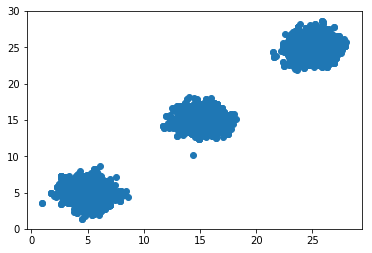

In [19]:
data = np.zeros(shape=(9000,6))
x = np.zeros(shape=(9000,3)) #1,x1,x2
r = np.zeros(shape=(9000,3)) #class1,class2,class3

for i in range(1,3):
    for t in range(9000):
        if t%3 == 0:
            data[t,i] = random.gauss(25, 1)
            data[t,3] = 1
        elif t%2 == 0: 
            data[t,i] = random.gauss(15, 1)
            data[t,4] = 1
        else:
            data[t,i] = random.gauss(5, 1)
            data[t,5] = 1
   
for t in range(9000):
    data[t,0] = 1

random.shuffle(data)

x = data[:,0:3]
r = data[:,3:6]

plt.scatter(x[:,1],x[:,2])
plt.show()

In [20]:
x_norm = np.zeros(shape=(len(x),x.shape[1]))
for i in range(1,x.shape[1]):
    for t in range(len(x)):
        x_norm[t,i] = (x[t,i]-min(x[:,i]))/(max(x[:,i])-min(x[:,i]))

for t in range(len(x)):
        x_norm[t,0] = 1

## Test Log Regression

In [21]:
weights = log_regression(x_norm[:7000],r[:7000],0.1,0.7,10)
accuracy = test_log_regression(x_norm[7000:],r[7000:],weights)

Training Accuracy: 98.4857142857143
Test Accuracy: 100.0


## Test Back Prop

In [22]:
H = 2
weights = back_prop(x_norm[:7000],r[:7000],H,0.1,0.7,1)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[7000:],r[7000:],H,v_weights,w_weights)

Training Accuracy: 91.64285714285715
Test Accuracy: 100.0


# Training and Testing Data Set 1

In [23]:
x_norm = np.zeros(shape=(len(data_input_matrix_1),data_input_matrix_1.shape[1]))
for i in range(1,data_input_matrix_1.shape[1]):
    for t in range(len(data_input_matrix_1)):
        x_norm[t,i] = (data_input_matrix_1[t,i]-min(data_input_matrix_1[:,i]))/(max(data_input_matrix_1[:,i])-min(data_input_matrix_1[:,i]))

for t in range(len(data_input_matrix_1)):
        x_norm[t,0] = 1

## Log Regression

### 10

In [24]:
weights = log_regression(x_norm[:861],expected_matrix_1[:861],0.1,0.7,10)
accuracy = test_log_regression(x_norm[861:],expected_matrix_1[861:],weights)

Training Accuracy: 32.17189314750291
Test Accuracy: 27.77777777777778


### 50

In [25]:
weights = log_regression(x_norm[:861],expected_matrix_1[:861],0.1,0.7,50)
accuracy = test_log_regression(x_norm[861:],expected_matrix_1[861:],weights)

Training Accuracy: 37.16608594657375
Test Accuracy: 39.351851851851855


### 100

In [26]:
weights = log_regression(x_norm[:861],expected_matrix_1[:861],0.1,0.7,100)
accuracy = test_log_regression(x_norm[861:],expected_matrix_1[861:],weights)

Training Accuracy: 39.83739837398374
Test Accuracy: 42.129629629629626


### 500

In [27]:
weights = log_regression(x_norm[:861],expected_matrix_1[:861],0.1,0.7,500)
accuracy = test_log_regression(x_norm[861:],expected_matrix_1[861:],weights)

Training Accuracy: 44.83159117305458
Test Accuracy: 49.53703703703704


## Back Prop

### H=2, 10

In [28]:
H = 2
weights = back_prop(x_norm[:861],expected_matrix_1,H,0.1,0.7,10)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[861:],expected_matrix_1[861:],H,v_weights,w_weights)

Training Accuracy: 18.81533101045296
Test Accuracy: 13.88888888888889


### H=2, 50

In [29]:
H = 2
weights = back_prop(x_norm[:861],expected_matrix_1,H,0.1,0.7,50)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[861:],expected_matrix_1[861:],H,v_weights,w_weights)

Training Accuracy: 37.39837398373984
Test Accuracy: 38.425925925925924


### H=2, 100

In [30]:
H = 10
weights = back_prop(x_norm[:861],expected_matrix_1,H,0.1,0.7,100)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[861:],expected_matrix_1[861:],H,v_weights,w_weights)

Training Accuracy: 44.134727061556326
Test Accuracy: 50.92592592592593


### H=2, 500

In [31]:
H = 2
weights = back_prop(x_norm[:861],expected_matrix_1,H,0.1,0.7,500)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[861:],expected_matrix_1[861:],H,v_weights,w_weights)

Training Accuracy: 42.1602787456446
Test Accuracy: 39.81481481481482


# Training and Testing Data Set 2

In [32]:
x_norm = np.zeros(shape=(len(data_input_matrix_2),data_input_matrix_2.shape[1]))
for i in range(1,data_input_matrix_2.shape[1]):
    for t in range(len(data_input_matrix_2)):
        x_norm[t,i] = (data_input_matrix_2[t,i]-min(data_input_matrix_2[:,i]))/(max(data_input_matrix_2[:,i])-min(data_input_matrix_2[:,i]))

for t in range(len(data_input_matrix_2)):
        x_norm[t,0] = 1

## Log Regression

### 10

In [33]:
weights = log_regression(x_norm[:418],expected_matrix_2[:418],0.1,1,10)
accuracy = test_log_regression(x_norm[418:],expected_matrix_2[418:],weights)

Training Accuracy: 78.4688995215311
Test Accuracy: 68.57142857142857


### 50

In [34]:
weights = log_regression(x_norm[:418],expected_matrix_2,0.1,1,50)
accuracy = test_log_regression(x_norm[418:],expected_matrix_2[418:],weights)

Training Accuracy: 82.29665071770334
Test Accuracy: 79.04761904761905


### 100

In [35]:
weights = log_regression(x_norm[:418],expected_matrix_2,0.1,1,100)
accuracy = test_log_regression(x_norm[418:],expected_matrix_2[418:],weights)

Training Accuracy: 82.29665071770334
Test Accuracy: 79.04761904761905


### 500

In [36]:
weights = log_regression(x_norm[:418],expected_matrix_2,0.1,1,500)
accuracy = test_log_regression(x_norm[418:],expected_matrix_2[418:],weights)

Training Accuracy: 83.25358851674642
Test Accuracy: 79.04761904761905


## Back Prop

### H=2,10

In [37]:
H = 2
weights = back_prop(x_norm[:418],expected_matrix_2,H,0.1,1,10)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[418:],expected_matrix_2[418:],H,v_weights,w_weights)

Training Accuracy: 41.866028708133975
Test Accuracy: 39.04761904761905


### H=2,50

In [38]:
H = 2
weights = back_prop(x_norm[:418],expected_matrix_2,H,0.1,1,50)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[418:],expected_matrix_2[418:],H,v_weights,w_weights)

Training Accuracy: 83.25358851674642
Test Accuracy: 76.19047619047619


### H=2,100

In [39]:
H = 2
weights = back_prop(x_norm[:418],expected_matrix_2,H,0.1,1,100)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[418:],expected_matrix_2[418:],H,v_weights,w_weights)

Training Accuracy: 83.97129186602871
Test Accuracy: 76.19047619047619


### H=2, 500

In [40]:
H = 2
weights = back_prop(x_norm[:418],expected_matrix_2,H,0.1,1,500)
v_weights = weights[0]
w_weights = weights[1]
accuracy = test_back_prop(x_norm[418:],expected_matrix_2[418:],H,v_weights,w_weights)

Training Accuracy: 85.64593301435407
Test Accuracy: 78.0952380952381
